# Teaching Professional Computational Modeling Skills with Jupyter

## Aaron Titus, High Point University


# Introduction


The purpose of this tutorial is to introduce you to Jupyter Notebook. 

Jupyter Notebook (formerly called iPython Notebook) is a web application (front-end) to create and share documents that contain live code, visualizations, and marked-up text and equations. Teachers can write tutorials, and students can write professional, interactive reports. Accessible to students and scalable to professionals, Jupyter Notebook is ideal for teaching computational modeling, data visualization, collaborative computing, and reporting.

# Matplotlib

The standard plotting package for Python is [Matplotlib](http://matplotlib.org/). However, there is also a web-based graphing program [Plotly](https://plot.ly/) that I've also used.  In this tutorial, we will use Matplotlib to graph data and compute a best-fit line.

An additional library, [numpy](http://www.numpy.org/), is frequently used for mathematical and scientific computation.  Together, matplotlib and numpy give Python similar functionality as a common application in engineering called [MATLAB](http://www.mathworks.com/products/matlab/index.html?s_tid=gn_loc_drop). The big advantage of Python over MATLAB is the price...Python is free!

## Importing Packages

Run the program in the cell below to import matplotlib and numpy packages.

In the first import statement, I only import the pyplot portion of  matplotlib. Furthermore, I import them into a namespace called ``plt`` (which I could have called just about anything). This means that I will have to use ``plt`` as a prefix when I call matplotlib functions. 

In this second import statement, I import all of numpy and do not use a namespace. Therefore, I can use numpy commands without using any prefix.  Most Python programmers will argue that this is not best practice because it can lead to collisions where different packages use the same names for their functions.

In [1]:
import matplotlib.pyplot as plt
from numpy import *
from __future__ import division, print_function

## Experiment

In this experiment, students used video analysis software to measure the motion of a steel ball rolling on a steel track. The video below shows the frames that were used for position and time data. In this notebook, we will plot the data for x(t) and fit a best-fit line to the data.

![animated gif](uniform-motion-ball-fast-main.gif)

## Reading Your Data

There are two ways to read data. You can store data in a text file (usually tab delimited or comma delimited) and read the file. Or you can copy and paste the data into the notebook cell. For small data sets, I prefer copying and pasting. For large data sets, reading a file is better.

In the example below, data was copied from a Tracker (video analysis software) and pasted in a tab-delimited format. The first column is time in s and the second column is x-position in m.

The variable ``datalist`` is a list. Each item in the list is a single row of tab-delimited data. The total number of rows is printed after the cell is run.

In [2]:
#
# Paste the data you wish to graph in tab-delimited rows in the format:
#
#       xdata <tab> ydata
#
# In this example, the x data is time (s) and y data is 
# x-position (m).
#

datalist = """
0	-0.003
0.334	0.171
0.667	0.346
1.001	0.527
1.335	0.698
1.668	0.872
2.002	1.05
2.336	1.232
2.669	1.403
3.003	1.57
3.337	1.741
""".split('\n') 

print("Total number of data points = ",len(datalist))


Total number of data points =  13


## Storing Your Data in Lists

We will store the time values and the x-position values in their own lists. Also, we have to convert the data from a ``string`` type to a ``float`` type.

In [3]:
#
# Take the list of strings defined above and store it as numbers in lists. 
#

tlist = [] # time data
xlist = [] # x position data

for s in datalist: #s represents a single row of data
    if s:
        t,x = s.split()     # split the string into two strings
        t=float(t)          # convert time string to float
        x=float(x)          # convert x string to float
        tlist.append(t)     # store time in a list
        xlist.append(x)     # store x in a list
        
print("The time data list is: ", tlist)
print("The x-position data list is: ", xlist)

The time data list is:  [0.0, 0.334, 0.667, 1.001, 1.335, 1.668, 2.002, 2.336, 2.669, 3.003, 3.337]
The x-position data list is:  [-0.003, 0.171, 0.346, 0.527, 0.698, 0.872, 1.05, 1.232, 1.403, 1.57, 1.741]


## Plotting data points

We will use ``matplotlib`` to graph data. By default, the graphs will be displayed in a separate browser window. However, I prefer to display graphs within the notebook. To display graphs within notebook, we must run what is known in the Jupyter world as a ``magic`` command.

In [14]:
%matplotlib inline

We imported ``matplotlib.pyplot`` as ``plt`` so we have to use ``plt`` as a prefix to the matplotlib functions. I typically use the five commands shown below to create a title, create axis labels, create a plot, and finally produce the graph image.

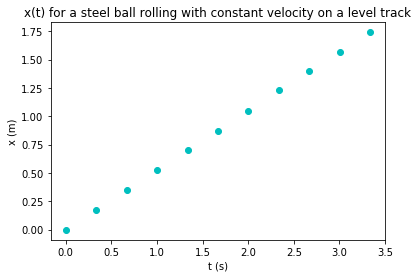

In [4]:
#
# Graph data
#

plt.title('x(t) for a steel ball rolling with constant velocity on a level track')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.plot(tlist,xlist,'co')
plt.show()


The plot command:

```python

plt.plot(tlist,xlist,'co')

```

takes as input the data list for the horizontal axis, the data list for the vertical axis, and parameters to determine the type and color of the data point. In this case ``c`` is for cyan and ``o`` is for a large filled circle.

You can try:

```python

plt.plot(tlist,xlist,'or-')

```

for a red solid line plot.  You can try:

```python

plt.plot(tlist,xlist,'b.')

```

for a blue scatter plot with small filled circles.  The following:

```python

plt.plot(tlist,xlist,'m+')

```

will produce magenta ``+`` symbols for the data points.

Here are letters for various colors.

| letter | color || letter | color |
| -- | -- | -- |  -- | -- |
|b | blue || m | magenta |
|g  |  green  ||  y  |  yellow  | 
|r  |  red || k  |  black |
|c | cyan || w | white |

Here are symbols for various types of markers.

| symbol | marker || symbol | marker |
| -- | -- | -- |  -- | -- |
| `s` | square marker | | `p` | pentagon marker |
|`D` | diamond marker | | `d` | thin diamond marker|
|`*` | star marker | | `+` | plus marker|
|`h` | hexagon1 marker | | `H` | hexagon2 marker|
|`x` | x marker | | | | |

Use `-` for solid line and `--` for a dashed line.

In the cell below, try plotting graphs with various markers and lines.


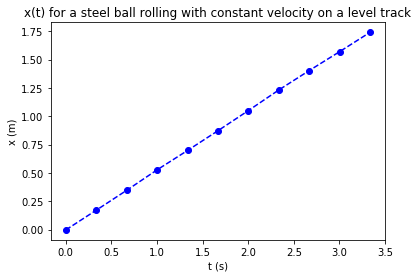

In [5]:
#
# Graph data
#

plt.title('x(t) for a steel ball rolling with constant velocity on a level track')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.plot(tlist,xlist,'ob--')
plt.show()


## Graphing and Fitting a Best Fit Line

There are two goals that one might have:
    
1. graph a line and manually adjust parameters to find the best fit
2. compute and then graph the best fit line

The first case requires you to guess or compute separately the slope and intercept of the best-fit line. The second case uses code to determine the best fit line; typically this code is provided through functions in a package so you don't have to write your own. (Although it can be quite fun to write your own!)

### Graphing a line and manually adjusting parameters

We will use the ``numpy`` package. It allows you to use an array (of data) in an algebraic function. The equation of a line is familiarly written as:

$$y=mx+b$$

where $x$ represents the x value of a data point and $y$ represents the y value of the same data point. However, in plotting a set of data points, then you want to pass to this function an array $X$ (x values of all data points) and compute an array $Y$ of the corresponding set of y values of all data points.  The ``numpy`` package has a function ``array()`` that converts a list of data to an array of data.

```python

#generate an array of time values of data points in a list
tarray=array(tlist)

```

The difference between a list and an array is that a list is a way of storing objects together and an array is a mathematical entity that has rules for multiplication, finding the determinant, etc.

Let's guess at the slope and intercept of our data. I'll use:

$$m=0.6$$

$$b=0$$

Then, we will compute an array of y values (x position) for an array of x values (time) and graph both the data points and the array of y values (from $y=mx+b$) on the same graph. I'll use a solid line graph for the line and solid circles for the data points.

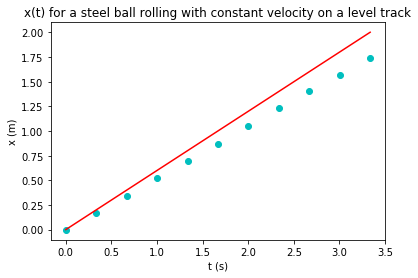

In [6]:
m=0.6 #slope
b=0 #intercept
y=m*array(tlist)+b #y=mx*b is the best-fit function

plt.title('x(t) for a steel ball rolling with constant velocity on a level track')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.plot(tlist,xlist,'co',tlist,y,'r-')
plt.show()


This may not be the best fit line, but you can manually adjust $m$ and $b$ until you get a reasonable line.

Note that there is nothing special about $y=mx+b$.  We could have computed a quadratic 

$$y=ax^2+bx+c$$

and plotted the resulting curve with the data. So this technique can be used with any function that might fit the data, including sinusoidal functions for example.

### Computing and then graphing a best fit line

We have to import the ``curve_fit`` function from the package ``scipy.optimize`` to compute the best-fit line.

In [20]:
from scipy.optimize import curve_fit

Once again, I'll use the venerable

$$y=mx+b$$

as my equation for a line. Create a function that takes an array of data for x values and returns the y values.

In [21]:
#function takes an array of x values and returns an array of y values
#  where y=mx+b
def func(x, m, b):
    return m*x+b #linear function

Now convert our lists of data, ``tlist`` and ``xlist``, to arrays ``xarray`` and ``yarray``. Note that time is on the horizontal axis and x-position is on the vertical axis of our graph.

Then pass these arrays along with our best-fit function named ``func`` (which is a line) to ``curve_fit()``. It returns the values of the constants (m and b in this case) for the best fit line as a list, along with statistical measures for each of the constants.  For now, I will ignore the statistics and just get the constants which I will call ``mbest`` and ``bbest``.

In [22]:
#convert list to a numpy array
yarray=asarray(xlist)
xarray=asarray(tlist)
constants, stats = curve_fit(func, xarray, yarray)

#constants is a list
mbest=constants[0] #slope
bbest=constants[1] #intercept

print("Best fit: m=",mbest," and b=",bbest)

Best fit: m= 0.5244386582  and b= -0.00159075185516


We can pass these best-fit values back to our function, obtain the array of best-fit y values, and then graph the best-fit data points along with our measured data points.

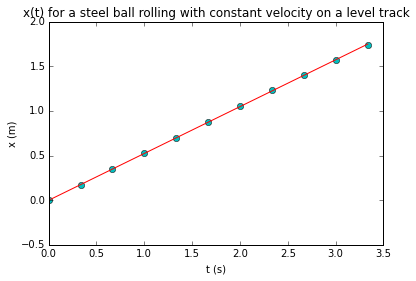

In [23]:
ybest=func(xarray,mbest,bbest) #y values for best fit function

plt.title('x(t) for a steel ball rolling with constant velocity on a level track')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.plot(tlist,xlist,'co',tlist,ybest,'r-')
plt.show()

Once again, there is nothing special here about a line. We can define whatever function we want in ``func()`` so we could certainly obtain a best fit quadratic for example.